In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import  combinations_with_replacement
import math
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
%matplotlib inline

In [3]:
def length_of_design_matrix(m,d):
    # print(m,d)
    # print((math.factorial(m+d))/(math.factorial(m)*math.factorial(d)))
    return (math.factorial(m+d))/(math.factorial(m)*math.factorial(d))

In [4]:
def generate(m,data_point):
    lst = []
    for i in range(m+1):
        combination = combinations_with_replacement(data_point,i)
        s = [np.prod(comb) for comb in combination]
        lst = lst + s
    return lst

In [5]:
generate(3,[2.])

[np.float64(1.0), np.float64(2.0), np.float64(4.0), np.float64(8.0)]

In [6]:
def design_matrix(n,m,D,Data_points):
    # print(n,D)
    basis_func = np.zeros((n,D),dtype=np.float64)
    # print(basis_func)
    for i in range(n):
        # print(generate(m,Data_points[i]))
        basis_func[i] = generate(m,Data_points[i])
    return basis_func

In [7]:
def predict(weights,x,m):
    # print(len(generate(m,x)))
    # print(weights.shape)
    # print(np.transpose(weights).shape)
    z = np.array(generate(m,x))
    z = z.reshape(-1,1)
    weights = (np.array(weights)).reshape(-1,1)
    x = np.transpose(z) @ weights
    # print("for ",np.transpose(z)," and ",weights)
    
    # print("x is ",x)
    return x[0][0]

In [8]:
def model(target,Data,m,D,Data_size,l):
    # print("D in model is ",D)
    basis_func = design_matrix(Data_size,m,D,Data)
    # print(l)
    x = np.linalg.inv((np.transpose(basis_func)@basis_func) + l*np.identity(D))
    # print(x)
    weights = x @ np.transpose(basis_func) @ np.transpose(target)
    return weights

In [9]:
print(4*np.identity(5))

[[4. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 4.]]


In [10]:
def error_rms(predicted, expected):
    x = [(predicted[i] - expected[i]) ** 2 for i in range(len(predicted))]
    return np.mean(x) ** 0.5

In [11]:
# for m in [2,3,5,6,9]:
l= 0
df = pd.read_csv('2D_data_10/train50_10.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['x1'],row['x2']])
    target.append(row['y'])# Convert the Series to a list and append it to 'data'
# D=int(length_of_design_matrix(m,len(data[0])))
# weights = model(target,data,m,D,len(data),l)
    # predicted = [predict(weights,x,m) for x in data]
    # x_fit = np.linspace(min(data), max(data), 100)
    # y_fit = [predict(weights,[x],m) for x in x_fit]
    
    # # Plot original data
    
    # plt.scatter(data, target, color='blue', label='Data')
    # plt.plot(x_fit, y_fit, label=f'Fit (m={m})')
    # plt.xlabel('Input')
    # plt.ylabel('Output')
    # plt.legend()
    # plt.title('Data Fitting Curves')
    # plt.show()

    # Plot fitted curve
    
    
df = pd.read_csv('2D_data_10/test_10.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['x1'],row['x2']])
    target_test.append(row['y'])# Convert the Series to a list and append it to 'data'
    # x_fit = np.linspace(min(data_test), max(data_test), 100)
    # y_fit = [predict(weights,[x],m) for x in x_fit]
    # # print(data)
    # # print(target)
    # # print(data_test)
    # # print(target_test)
    # # Plot original data
    # plt.scatter(data_test, target_test, color='red', label='Data')
    # plt.plot(x_fit, y_fit, label=f'Fit (m={m})')
    # plt.xlabel('Input')
    # plt.ylabel('Output')
    # plt.legend()
    # plt.title('Data Fitting Curves')
    # plt.show()
df = pd.read_csv('2D_data_10/test_10.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['x1'],row['x2']])
    target_valid.append(row['y'])

    
Erms_train = []
Erms_test = []
Erms_valid = []
Data_size = len(data)
for m in range(1,6):
    D=int(length_of_design_matrix(m,len(data[0])))
    # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    act = []
    for x in data:
        act.append(predict(weightsi,x,m))
    act_test =[]
    for x in data_test:
        act_test.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    Erms_test.append(error_rms(act_test,target_test))
    Erms_train.append(error_rms(act,target))
    Erms_valid.append(error_rms(act_valid,target_valid))
    # x = [d[0] for d in data]
    # y = [d[1] for d in data]
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_trisurf(x, y, z, color='blue', edgecolor='none')

    # # Add labels
    # ax.set_xlabel('X1')
    # ax.set_ylabel('X2')
    # ax.set_zlabel('Predicted Y')

    # # Show the plot
    # plt.show()
    

model_orders = list(range(1,6))
nms = len(model_orders)

    # Create the plot
i=0
for j in range(1,nms):
    if Erms_valid[j]<Erms_valid[i]:
        i=j
print("m with least Erms for validation data is ",i+1)
plt.figure(figsize=(10, 6))
plt.plot(model_orders, Erms_train, marker='o', linestyle='-', color='b', label='Erms Train')
plt.plot(model_orders, Erms_test, marker='o', linestyle='--', color='r', label='Erms Test')

    # Add labels and title
plt.xlabel('Model Order M')
plt.ylabel('Erms (Root Mean Square Error)')
plt.title('Training and Testing Erms vs. Model Order')
plt.legend()
plt.grid(True)

    # Show the plot
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '2D_data_10/train50_10.csv'

m with least Erms for validation data is  3


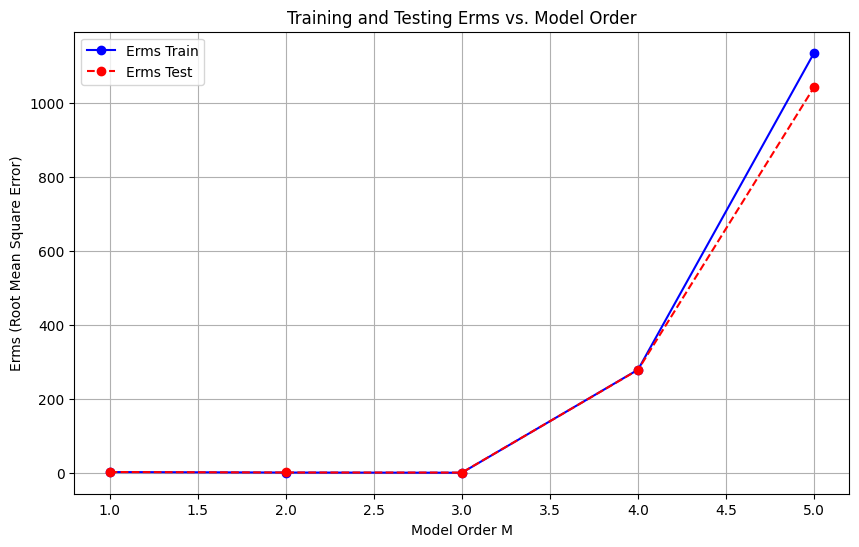

In [21]:
df = pd.read_csv("dataset3/train_data.csv")
data = []
target = []
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data.append(lst)
df = pd.read_csv("dataset3/train_label.csv")
for index, row in df.iterrows():
    for col in row:
        target.append(col)
df = pd.read_csv('dataset3/validation_data.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_valid.append(lst)
df = pd.read_csv('dataset3/validation_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_valid.append(col)

df = pd.read_csv('dataset3/test_data.csv')   
data_test=[]
target_test=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_test.append(lst)
df = pd.read_csv('dataset3/test_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_test.append(col)


Erms_train = []
Erms_test = []
Erms_valid = []
Data_size = len(data)
for m in range(1,6):
    l=0
    D=int(length_of_design_matrix(m,len(data[0])))
    # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    act = []
    for x in data:
        act.append(predict(weightsi,x,m))
    act_test =[]
    for x in data_test:
        act_test.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    Erms_test.append(error_rms(act_test,target_test))
    Erms_train.append(error_rms(act,target))
    Erms_valid.append(error_rms(act_valid,target_valid))
    # x = [d[0] for d in data]
    # y = [d[1] for d in data]
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_trisurf(x, y, z, color='blue', edgecolor='none')

    # # Add labels
    # ax.set_xlabel('X1')
    # ax.set_ylabel('X2')
    # ax.set_zlabel('Predicted Y')

    # # Show the plot
    # plt.show()
    

model_orders = list(range(1,6))
nms = len(model_orders)

    # Create the plot
i=0
for j in range(1,nms):
    if Erms_valid[j]<Erms_valid[i]:
        i=j
print("m with least Erms for validation data is ",i+1)
plt.figure(figsize=(10, 6))
plt.plot(model_orders, Erms_train, marker='o', linestyle='-', color='b', label='Erms Train')
plt.plot(model_orders, Erms_test, marker='o', linestyle='--', color='r', label='Erms Test')

    # Add labels and title
plt.xlabel('Model Order M')
plt.ylabel('Erms (Root Mean Square Error)')
plt.title('Training and Testing Erms vs. Model Order')
plt.legend()
plt.grid(True)

    # Show the plot
plt.show()
    